In [1]:
import xarray as xr
from glob import glob
import geopandas as gpd
import rasterio as rio
import numpy as np
import pandas as pd
from rasterstats import zonal_stats

import os

In [2]:
import pyproj

### Transpose netCDF data

In [18]:
ncdf_lst = glob(os.path.join(r'../data/LandCover/GCAM_Demeter/SSP2_RCP45_GFDL','*ssp*.nc'))

for d in ncdf_lst:
    print(d)
    yr = d.split('.')[2][-4:]
    output = '../data/LandCover/GCAM_Demeter/SSP2_RCP45_GFDL/{0}.nc'.format(yr)
    if not os.path.exists(output):
        ds = xr.open_dataset(d)#'../data/LandCover/GCAM_Demeter/SSP2_RCP45_GFDL/GCAM_Demeter_LU_ssp2_rcp45_gfdl_{0}.nc'.format(yr))
        dtran = ds.transpose()
        dtran.to_netcdf(output)
        print(yr, 'saved.')
        del(ds)
        del(dtran)
    else:
        print(yr, 'exists.')
        
print('SSP2 RCP4.5 done.')

../data/ClimateData/GCAM_Demeter/SSP2_RCP45_GFDL\GCAM_Demeter_LU_ssp2_rcp45_gfdl_2100.nc
2100 exists.
../data/ClimateData/GCAM_Demeter/SSP2_RCP45_GFDL\GCAM_Demeter_LU_ssp2_rcp45_gfdl_2095.nc
2095 exists.
../data/ClimateData/GCAM_Demeter/SSP2_RCP45_GFDL\GCAM_Demeter_LU_ssp2_rcp45_gfdl_2090.nc
2090 exists.
../data/ClimateData/GCAM_Demeter/SSP2_RCP45_GFDL\GCAM_Demeter_LU_ssp2_rcp45_gfdl_2085.nc
2085 exists.
../data/ClimateData/GCAM_Demeter/SSP2_RCP45_GFDL\GCAM_Demeter_LU_ssp2_rcp45_gfdl_2080.nc
2080 exists.
../data/ClimateData/GCAM_Demeter/SSP2_RCP45_GFDL\GCAM_Demeter_LU_ssp2_rcp45_gfdl_2075.nc
2075 exists.
../data/ClimateData/GCAM_Demeter/SSP2_RCP45_GFDL\GCAM_Demeter_LU_ssp2_rcp45_gfdl_2070.nc
2070 exists.
../data/ClimateData/GCAM_Demeter/SSP2_RCP45_GFDL\GCAM_Demeter_LU_ssp2_rcp45_gfdl_2065.nc
2065 exists.
../data/ClimateData/GCAM_Demeter/SSP2_RCP45_GFDL\GCAM_Demeter_LU_ssp2_rcp45_gfdl_2060.nc
2060 exists.
../data/ClimateData/GCAM_Demeter/SSP2_RCP45_GFDL\GCAM_Demeter_LU_ssp2_rcp45_gfdl_2

In [19]:
ncdf_lst = glob(os.path.join(r'../data/LandCover/GCAM_Demeter/SSP5_RCP85_GFDL','*ssp*.nc'))

for d in ncdf_lst:
    print(d)
    yr = d.split('.')[2][-4:]
    output = '../data/LandCover/GCAM_Demeter/SSP5_RCP85_GFDL/{0}.nc'.format(yr)
    if not os.path.exists(output):
        ds = xr.open_dataset(d)
        dtran = ds.transpose()
        dtran.to_netcdf(output)
        print(yr, 'saved.')
        del(ds)
        del(dtran)
    else:
        print(yr, 'exists.')
        
print('SSP5 RCP8.5 done.')

../data/ClimateData/GCAM_Demeter/SSP5_RCP85_GFDL\GCAM_Demeter_LU_ssp5_rcp85_gfdl_2015.nc
2015 exists.
../data/ClimateData/GCAM_Demeter/SSP5_RCP85_GFDL\GCAM_Demeter_LU_ssp5_rcp85_gfdl_2100.nc
2100 exists.
../data/ClimateData/GCAM_Demeter/SSP5_RCP85_GFDL\GCAM_Demeter_LU_ssp5_rcp85_gfdl_2095.nc
2095 exists.
../data/ClimateData/GCAM_Demeter/SSP5_RCP85_GFDL\GCAM_Demeter_LU_ssp5_rcp85_gfdl_2090.nc
2090 exists.
../data/ClimateData/GCAM_Demeter/SSP5_RCP85_GFDL\GCAM_Demeter_LU_ssp5_rcp85_gfdl_2085.nc
2085 exists.
../data/ClimateData/GCAM_Demeter/SSP5_RCP85_GFDL\GCAM_Demeter_LU_ssp5_rcp85_gfdl_2080.nc
2080 exists.
../data/ClimateData/GCAM_Demeter/SSP5_RCP85_GFDL\GCAM_Demeter_LU_ssp5_rcp85_gfdl_2075.nc
2075 exists.
../data/ClimateData/GCAM_Demeter/SSP5_RCP85_GFDL\GCAM_Demeter_LU_ssp5_rcp85_gfdl_2070.nc
2070 exists.
../data/ClimateData/GCAM_Demeter/SSP5_RCP85_GFDL\GCAM_Demeter_LU_ssp5_rcp85_gfdl_2060.nc
2060 exists.
../data/ClimateData/GCAM_Demeter/SSP5_RCP85_GFDL\GCAM_Demeter_LU_ssp5_rcp85_gfdl_2

### Make gdal batch script

In [20]:
# List filepaths for all bands in the scence
FileList = glob(os.path.join(r'../data/LandCover/GCAM_Demeter/SSP2_RCP45_GFDL','2*.nc'))

# Define clipping extent
# xmin, ymin, xmax,ymax = (0, 0, 0, 0) # INSERT HERE THE CORRECT COORDINATES
srs, tr, cutline = ('EPSG:4326', '0.050000001695656514 -0.049999999152053956', \
    '"G:\\My Drive\\Research\\data\\Shapefiles\\HUC08_outline_clean.shp"')

# Generate gdalwarp command for each band
command = ""

for fp in FileList:
    # inputfile = fp
    yr = fp.split('.')[2][-4:]
    for i in range(34):
        # outputfile = inputfile[:-4] + "_clip.tif"
        output = '"G:/My Drive/Research/data/LandCover/GCAM_Demeter/SSP2_RCP45_GFDL/clipped/{0}_{1}_clipped.tif"'.format(yr, i)
        crop_to_cutline = '"NETCDF:""G:/My Drive/Research/data/LandCover/GCAM_Demeter/SSP2_RCP45_GFDL/{0}.nc"":PFT{1}"'.format(yr, i)
        if not os.path.exists(output):
            command += 'gdalwarp -s_srs {0} -t_srs {0} -of GTiff -tr {1} -tap -cutline {2} -cl HUC08_outline_clean -crop_to_cutline {3} {4} \n'.format(srs, tr, cutline, crop_to_cutline, output)

'''
gdalwarp -s_srs EPSG:4326 -t_srs EPSG:4326 -of GTiff -tr 0.050000001695656514 -0.049999999152053956 -tap -cutline "G:\\My Drive\\Research\\data\\Shapefiles\\HUC08_outline_clean.shp" -cl HUC08_outline_clean -crop_to_cutline "NETCDF:""G:/My Drive/Research/data/LandCover/GCAM_Demeter/SSP2_RCP45_GFDL/2015.nc"":PFT4" "G:/My Drive/Research/data/LandCover/GCAM_Demeter/SSP2_RCP45_GFDL/2015_4_clipped.tif"

'''
# Write the commands to an .sh file
cmd_file = "ClipSE_LCLU_SSP2_RCP45_GFDL.bat"
f = open(os.path.join(cmd_file), 'w')

f.write(command)
f.close()

In [21]:
# List filepaths for all bands in the scence
FileList = glob(os.path.join(r'../data/LandCover/GCAM_Demeter/SSP5_RCP85_GFDL','2*.nc'))

# Define clipping extent
# xmin, ymin, xmax,ymax = (0, 0, 0, 0) # INSERT HERE THE CORRECT COORDINATES
srs, tr, cutline = ('EPSG:4326', '0.050000001695656514 -0.049999999152053956', \
    '"G:\\My Drive\\Research\\data\\Shapefiles\\HUC08_outline_clean.shp"')

# Generate gdalwarp command for each band
command = ""

for fp in FileList:
    # inputfile = fp
    yr = fp.split('.')[2][-4:]
    for i in range(34):
        # outputfile = inputfile[:-4] + "_clip.tif"
        output = '"G:/My Drive/Research/data/LandCover/GCAM_Demeter/SSP5_RCP85_GFDL/clipped/{0}_{1}_clipped.tif"'.format(yr, i)
        crop_to_cutline = '"NETCDF:""G:/My Drive/Research/data/LandCover/GCAM_Demeter/SSP5_RCP85_GFDL/{0}.nc"":PFT{1}"'.format(yr, i)
        if not os.path.exists(output):
            command += 'gdalwarp -s_srs {0} -t_srs {0} -of GTiff -tr {1} -tap -cutline {2} -cl HUC08_outline_clean -crop_to_cutline {3} {4} \n'.format(srs, tr, cutline, crop_to_cutline, output)

'''
gdalwarp -s_srs EPSG:4326 -t_srs EPSG:4326 -of GTiff -tr 0.050000001695656514 -0.049999999152053956 -tap -cutline "G:\\My Drive\\Research\\data\\Shapefiles\\HUC08_outline_clean.shp" -cl HUC08_outline_clean -crop_to_cutline "NETCDF:""G:/My Drive/Research/data/LandCover/GCAM_Demeter/SSP5_RCP85_GFDL/2015.nc"":PFT4" "G:/My Drive/Research/data/LandCover/GCAM_Demeter/SSP5_RCP85_GFDL/2015_4_clipped.tif"

'''
# Write the commands to an .sh file
cmd_file = "ClipSE_LCLU_SSP5_RCP85_GFDL.bat"
f = open(os.path.join(cmd_file), 'w')

f.write(command)
f.close()

In [22]:
# rename clips

for i in range(2015, 2101, 5):
    for j in range(10):
        cur = "../data/LandCover/GCAM_Demeter/SSP2_RCP45_GFDL/clipped/{0}_{1}_clipped.tif".format(i, j)
        new = "../data/LandCover/GCAM_Demeter/SSP2_RCP45_GFDL/clipped/{0}_0{1}_clipped.tif".format(i, j)
        if not os.path.exists(new):
            os.rename(cur, new)
            print(new)


In [23]:
# rename clips

for i in range(2015, 2101, 5):
    for j in range(10):
        cur = "../data/LandCover/GCAM_Demeter/SSP5_RCP85_GFDL/clipped/{0}_{1}_clipped.tif".format(i, j)
        new = "../data/LandCover/GCAM_Demeter/SSP5_RCP85_GFDL/clipped/{0}_0{1}_clipped.tif".format(i, j)
        if not os.path.exists(new):
            os.rename(cur, new)
            print(new)


### Merge clipped rasters

In [24]:
os.path.exists(new)

True

In [25]:
for i in range(2015,2101,5):
    print(i)
    inputFileList = glob('../data/LandCover/GCAM_Demeter/SSP2_RCP45_GFDL/clipped/{0}*.tif'.format(i))
    inputFileList.sort()
    inputFiles = ""
    output = '../data/LandCover/GCAM_Demeter/SSP2_RCP45_GFDL/stacked/{0}.tif'.format(i)
    if not os.path.exists(output):
        for fl in inputFileList:
            inputFiles += " {}".format(fl)
        
        command = "gdal_merge.py -separate {0} -o {1}".format(inputFiles, output)
        os.system(command)
        print(i, 'saved.')
    else:
        print(i, 'exists.')

2015
2015 exists.
2020
2020 exists.
2025
2025 exists.
2030
2030 exists.
2035
2035 exists.
2040
2040 exists.
2045
2045 exists.
2050
2050 exists.
2055
2055 exists.
2060
2060 exists.
2065
2065 exists.
2070
2070 exists.
2075
2075 exists.
2080
2080 exists.
2085
2085 exists.
2090
2090 exists.
2095
2095 exists.
2100
2100 exists.


In [ ]:
for i in range(2015,2101,5):
    print(i)
    inputFileList = glob('../data/LandCover/GCAM_Demeter/SSP5_RCP85_GFDL/clipped/{0}*.tif'.format(i))
    inputFileList.sort()
    inputFiles = ""
    output = '../data/LandCover/GCAM_Demeter/SSP5_RCP85_GFDL/stacked/{0}.tif'.format(i)
    if not os.path.exists(output):
        for fl in inputFileList:
            inputFiles += " {}".format(fl)
        
        command = "gdal_merge.py -separate {0} -o {1}".format(inputFiles, output)
        os.system(command)
        print(i, 'saved.')
    else:
        print(i, 'exists.')

2015
2015 saved.
2020
2020 saved.
2025
2025 saved.
2030
2030 saved.
2035
2035 saved.
2040
2040 saved.
2045
2045 saved.
2050
2050 saved.
2055
2055 saved.
2060
2060 saved.
2065
2065 saved.
2070
2070 saved.
2075
2075 saved.
2080
2080 saved.
2085
2085 saved.
2090
2090 saved.
2095
2095 saved.
2100
2100 saved.


### Calculate Percent Land Cover at Pixel and HUC scale

#### Sum all Natural, Agricultural, and Intensive percentages

In [ ]:
# Read raster bands directly to Numpy arrays.

for ssp_rcp in ['SSP2_RCP45_GFDL', 'SSP5_RCP85_GFDL']:
    print('starting', ssp_rcp)
    for yr in range(2015, 2101, 5):
        in_fl = '../data/LandCover/GCAM_Demeter/{0}/stacked/{1}.tif'.format(ssp_rcp, yr)
        out_fl = '../data/LandCover/GCAM_Demeter/{0}/reclass/{1}_reclass.tif'.format(ssp_rcp, yr)
        
        if os.path.exists(out_fl):
            print(out_fl, 'exists.')
            continue

        with rio.open(in_fl) as src:
            for i in range(2, 34): # start with 2 because 0 is not a band index and 1 is water
                # print(i)
                src_data = src.read(i)
                if i == 2:
                    np_shape = (3, src_data.shape[0], src_data.shape[1])
                    suit_raster = np.zeros(np_shape, dtype=rio.float32)
                if i < 16:
                    suit_raster[0] += src_data
                elif i < 32:
                    suit_raster[1] += src_data
                elif i < 34:
                    suit_raster[2] += src_data
                del(src_data)

            profile = src.profile
            profile.update(count=3)
            # print(src.profile)
            # print(profile)

        with rio.open(out_fl, "w", **profile) as dst:
            dst.write(suit_raster)

            dst.set_band_description(1, "NATURAL")
            dst.set_band_description(2, "AGRICULTURAL")
            dst.set_band_description(3, "INTENSIVE")
        print(yr, "saved.")
    print('finished', ssp_rcp, '\n')

        


starting SSP2_RCP45_GFDL
2015 saved.
2020 saved.
2025 saved.
2030 saved.
2035 saved.
2040 saved.
2045 saved.
2050 saved.
2055 saved.
2060 saved.
2065 saved.
2070 saved.
2075 saved.
2080 saved.
2085 saved.
2090 saved.
2095 saved.
2100 saved.
finished SSP2_RCP45_GFDL 

starting SSP5_RCP85_GFDL
2015 saved.
2020 saved.
2025 saved.
2030 saved.
2035 saved.
2040 saved.
2045 saved.
2050 saved.
2055 saved.
2060 saved.
2065 saved.
2070 saved.
2075 saved.
2080 saved.
2085 saved.
2090 saved.
2095 saved.
2100 saved.
finished SSP5_RCP85_GFDL 



In [1]:
in_fl = '../data/LandCover/GCAM_Demeter/SSP2_RCP45_GFDL/stacked/2015.tif'
with rio.open(in_fl) as src:
    src_data = src.read(0) 
    print(src_data)

NameError: name 'rio' is not defined

In [ ]:
sum(suit_raster[1])

array([   0.      ,   49.      ,   31.6     ,  114.799995,   81.99999 ,
         53.100006,  109.9     ,  103.80001 ,  111.30002 ,  140.90001 ,
        466.60007 ,  682.9     , 1168.5     , 1473.8     , 1974.6     ,
       2172.2002  , 2260.1992  , 2200.8     , 2227.3997  , 2400.8997  ,
       2006.3997  , 1983.9999  , 1836.3997  , 1939.4995  , 2144.199   ,
       2418.8994  , 2461.0994  , 2650.8997  , 2595.8     , 2186.8005  ,
       1451.7998  , 1402.0997  ,  949.3999  ,  980.6     ,  695.09973 ,
        760.2001  ,  880.69977 , 1014.4999  , 1024.5     , 1114.0997  ,
       1355.1998  , 1694.2996  , 1757.6998  , 2082.7998  , 1981.5005  ,
       1670.7999  , 1857.2001  , 1874.0997  , 1840.4003  , 2046.3998  ,
       2357.2007  , 2490.4006  , 2583.3003  , 2682.0017  , 2685.4011  ,
       2570.8008  , 2654.8003  , 2704.7     , 2710.7002  , 2507.1995  ,
       2433.6995  , 2351.7004  , 1949.0997  , 1903.4998  , 1998.6995  ,
       1923.      , 1845.0994  , 1468.0996  , 1423.5999  ,  845.

In [ ]:
# sum bands of like LC types for 4 total bands (water, nat, ag, int)
# get sum of pixel percents for each land cover type
# get sum of pixels adn multiply by 100
# diveide sum of pixel percents by (sum pixels times 100)
# That should be the percent of land cover by km2 if the percents were already in km2

In [40]:
tif_paths = glob('../data/LandCover/GCAM_Demeter/SSP2_RCP45_GFDL/reclass/*_reclass.tif')

src = rio.open(tif_paths[0])
shp = gpd.read_file('../data/Shapefiles/HUC08_trimmed.shp')
huc8_reproj = shp.to_crs(crs=src.crs.to_dict())
# point_reproj = pt_shp.to_crs(dataset.crs.to_dict())
del(shp)
huc8 = huc8_reproj[['huc8','geometry']]
del(huc8_reproj)
huc8_df = pd.DataFrame(huc8['huc8'])
huc8_df['PR_AG'] = 0
huc8_df['PR_NAT'] = 0
huc8_df['PR_INT'] = 0



C:\Users\mdgai\anaconda3\envs\dswe\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [64]:
tif_paths = glob('../data/LandCover/GCAM_Demeter/SSP*_RCP**_GFDL/reclass/*_reclass.tif')
tif_paths

['../data/ClimateData/GCAM_Demeter\\SSP2_RCP45_GFDL\\reclass\\2015_reclass.tif',
 '../data/ClimateData/GCAM_Demeter\\SSP2_RCP45_GFDL\\reclass\\2020_reclass.tif',
 '../data/ClimateData/GCAM_Demeter\\SSP2_RCP45_GFDL\\reclass\\2025_reclass.tif',
 '../data/ClimateData/GCAM_Demeter\\SSP2_RCP45_GFDL\\reclass\\2030_reclass.tif',
 '../data/ClimateData/GCAM_Demeter\\SSP2_RCP45_GFDL\\reclass\\2035_reclass.tif',
 '../data/ClimateData/GCAM_Demeter\\SSP2_RCP45_GFDL\\reclass\\2040_reclass.tif',
 '../data/ClimateData/GCAM_Demeter\\SSP2_RCP45_GFDL\\reclass\\2045_reclass.tif',
 '../data/ClimateData/GCAM_Demeter\\SSP2_RCP45_GFDL\\reclass\\2050_reclass.tif',
 '../data/ClimateData/GCAM_Demeter\\SSP2_RCP45_GFDL\\reclass\\2055_reclass.tif',
 '../data/ClimateData/GCAM_Demeter\\SSP2_RCP45_GFDL\\reclass\\2060_reclass.tif',
 '../data/ClimateData/GCAM_Demeter\\SSP2_RCP45_GFDL\\reclass\\2065_reclass.tif',
 '../data/ClimateData/GCAM_Demeter\\SSP2_RCP45_GFDL\\reclass\\2070_reclass.tif',
 '../data/ClimateData/GCAM_D

In [49]:
array = src.read(1)
affine = src.transform
zs = zonal_stats(huc8, array, affine=affine, stats=['sum', 'count'], nodata=0, all_touched = False)
zs

[{'count': 59, 'sum': 3616.69970703125},
 {'count': 58, 'sum': 2869.10009765625},
 {'count': 34, 'sum': 3230.800048828125},
 {'count': 121, 'sum': 11619.5},
 {'count': 125, 'sum': 11957.5},
 {'count': 194, 'sum': 18284.900390625},
 {'count': 191, 'sum': 16532.900390625},
 {'count': 164, 'sum': 12456.5},
 {'count': 315, 'sum': 12159.7001953125},
 {'count': 146, 'sum': 13436.1005859375},
 {'count': 111, 'sum': 6589.49951171875},
 {'count': 228, 'sum': 20170.80078125},
 {'count': 73, 'sum': 6513.10009765625},
 {'count': 179, 'sum': 17279.900390625},
 {'count': 69, 'sum': 6602.0},
 {'count': 71, 'sum': 5712.0},
 {'count': 37, 'sum': 3522.60009765625},
 {'count': 118, 'sum': 10509.2001953125},
 {'count': 72, 'sum': 6938.5},
 {'count': 72, 'sum': 6972.2001953125},
 {'count': 177, 'sum': 16590.5},
 {'count': 105, 'sum': 9844.7998046875},
 {'count': 21, 'sum': 1763.89990234375},
 {'count': 86, 'sum': 4727.2001953125},
 {'count': 166, 'sum': 16457.099609375},
 {'count': 248, 'sum': 23044.5},
 {

In [51]:
zs_df = pd.DataFrame(zs)
zs_df = zs_df.fillna(0)
zs_df

,count,sum
0,59,3616.699707
1,58,2869.100098
2,34,3230.800049
3,121,11619.500000
4,125,11957.500000
...,...,...
305,126,8703.900391
306,204,17682.800781
307,213,15987.599609
308,235,21236.500000


In [63]:
huc8_df['PR_NAT'] += zs_df['sum'] / (zs_df['count'] * 100)
huc8_df


,huc8,PR_AG,PR_NAT,PR_INT
0,08030100,0,2.452000,0
1,08020100,0,1.978690,0
2,08060206,0,3.800941,0
3,08060205,0,3.841157,0
4,03180003,0,3.826400,0
...,...,...,...,...
305,03130004,0,2.763143,0
306,06030001,0,3.467216,0
307,03170009,0,3.002366,0
308,06030005,0,3.614723,0


In [82]:
tif_paths[0].split('\\')[3].split('_')[0]

'2015'

In [83]:
tif_paths = glob('../data/LandCover/GCAM_Demeter/SSP*_RCP**_GFDL/reclass/*_reclass.tif')

for i in range(len(tif_paths)):
    base_path = os.path.dirname(tif_paths[i])[:-7]
    yr = tif_paths[i].split('\\')[3].split('_')[0]
    
    out_path = base_path + 'zonal_pr_csvs/' + yr + "_pr_LCLU.csv"

    if os.path.exists(out_path):
        print(out_path, 'exists.')
        continue

    if i == 0:
        # src = rio.open(tif_paths[i])
        shp = gpd.read_file('../data/Shapefiles/HUC08_trimmed.shp')
        huc8_reproj = shp.to_crs(crs=src.crs.to_dict())
        # point_reproj = pt_shp.to_crs(dataset.crs.to_dict())
        del(shp)
        huc8 = huc8_reproj[['huc8','geometry']]
        del(huc8_reproj)
    
    huc8_df = pd.DataFrame(huc8['huc8'])
    huc8_df['PR_AG'] = 0
    huc8_df['PR_NAT'] = 0
    huc8_df['PR_INT'] = 0
    
    src = rio.open(tif_paths[i])

    affine = src.transform
    for j in [1,2,3]:
        array = src.read(j)
        
        zs = zonal_stats(huc8, array, affine=affine, stats=['sum', 'count'], nodata=0, all_touched = False)

        zs_df = pd.DataFrame(zs)
        zs_df = zs_df.fillna(0)

        if j == 1:
            var = 'PR_NAT'
        elif j == 2:
            var = 'PR_AG'
        elif j == 3:
            var = 'PR_INT'

        huc8_df[var] += zs_df['sum'] / (zs_df['count'] * 100)
    
        del(array)


    src.close()

    huc8_df.to_csv(out_path, index=False)
    print(out_path, 'saved.')

    del(huc8_df)

C:\Users\mdgai\anaconda3\envs\dswe\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


../data/ClimateData/GCAM_Demeter\SSP2_RCP45_GFDL\zonal_pr_csvs/2015_pr_LCLU.csv saved.
../data/ClimateData/GCAM_Demeter\SSP2_RCP45_GFDL\zonal_pr_csvs/2020_pr_LCLU.csv saved.
../data/ClimateData/GCAM_Demeter\SSP2_RCP45_GFDL\zonal_pr_csvs/2025_pr_LCLU.csv saved.
../data/ClimateData/GCAM_Demeter\SSP2_RCP45_GFDL\zonal_pr_csvs/2030_pr_LCLU.csv saved.
../data/ClimateData/GCAM_Demeter\SSP2_RCP45_GFDL\zonal_pr_csvs/2035_pr_LCLU.csv saved.
../data/ClimateData/GCAM_Demeter\SSP2_RCP45_GFDL\zonal_pr_csvs/2040_pr_LCLU.csv saved.
../data/ClimateData/GCAM_Demeter\SSP2_RCP45_GFDL\zonal_pr_csvs/2045_pr_LCLU.csv saved.
../data/ClimateData/GCAM_Demeter\SSP2_RCP45_GFDL\zonal_pr_csvs/2050_pr_LCLU.csv saved.
../data/ClimateData/GCAM_Demeter\SSP2_RCP45_GFDL\zonal_pr_csvs/2055_pr_LCLU.csv saved.
../data/ClimateData/GCAM_Demeter\SSP2_RCP45_GFDL\zonal_pr_csvs/2060_pr_LCLU.csv saved.
../data/ClimateData/GCAM_Demeter\SSP2_RCP45_GFDL\zonal_pr_csvs/2065_pr_LCLU.csv saved.
../data/ClimateData/GCAM_Demeter\SSP2_RCP45

In [ ]:
def interpolation(data1, data2, year1, year2, year_i):

    data1['PR_AG'] + (year_i - year1) * ((data2['PR_AG'] - data1['PR_AG']) / (year2 - year1))


    return

In [ ]:
csv_lst = glob("../data/LandCover/GCAM_Demeter/SSP2_RCP45_GFDL/zonal_pr_csvs/*.csv")



In [ ]:
sum(suit_raster[2])

array([   0.       ,    5.       ,    3.8000002,   10.599999 ,
          6.400001 ,    8.200001 ,    6.300001 ,    8.000002 ,
          7.800002 ,   11.500004 ,   50.999973 ,   51.59997  ,
         46.69997  ,   43.89997  ,   39.899975 ,   30.899975 ,
         25.599983 ,   26.29998  ,   24.799986 ,   26.599981 ,
         25.299988 ,   25.699987 ,   42.79995  ,   32.599983 ,
         39.499985 ,   46.399986 ,   45.999996 ,  129.90001  ,
        121.60002  ,  137.8      ,  165.1      ,  156.9      ,
        143.49998  ,  146.4      ,  156.09999  ,  146.5      ,
        146.39998  ,  173.59998  ,  195.49998  ,  270.30002  ,
        265.49997  ,  281.09995  ,  362.5      ,  304.19995  ,
        337.99997  ,  293.30005  ,  302.09995  ,  297.       ,
        290.09995  ,  279.8      ,  300.       ,  297.90002  ,
        270.99997  ,  268.3      ,  238.29997  ,  219.40004  ,
        247.80003  ,  319.30005  ,  305.10004  ,  273.69995  ,
        275.8999   ,  273.7      ,  255.59996  ,  251.1

In [ ]:
np_shape = (3, src_data.shape[1], src_data.shape[2])
np_shape

(3, 302, 327)

In [ ]:
np.array_equal(src_data[0], src_data[1])


False

In [ ]:
test = rstr[1] 
for i in range(1, 15):
    print(i)
    test += rstr[i]
test

1
2
3
4
5
6
7
8
9
10
11
12
13
14


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test[10][150]

217.5

In [ ]:
d = '../data/LandCover/GCAM_Demeter/SSP2_RCP45_GFDL/2020.nc'
ds = xr.open_dataset(d)
ds.head

<bound method Dataset.head of <xarray.Dataset>
Dimensions:    (latitude: 3600, longitude: 7200)
Coordinates:
  * latitude   (latitude) float32 89.97 89.93 89.88 ... -89.88 -89.93 -89.97
  * longitude  (longitude) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Data variables: (12/33)
    PFT0       (latitude, longitude) float32 ...
    PFT1       (latitude, longitude) float32 ...
    PFT2       (latitude, longitude) float32 ...
    PFT3       (latitude, longitude) float32 ...
    PFT4       (latitude, longitude) float32 ...
    PFT5       (latitude, longitude) float32 ...
    ...         ...
    PFT27      (latitude, longitude) float32 ...
    PFT28      (latitude, longitude) float32 ...
    PFT29      (latitude, longitude) float32 ...
    PFT30      (latitude, longitude) float32 ...
    PFT31      (latitude, longitude) float32 ...
    PFT32      (latitude, longitude) float32 ...
Attributes:
    coordination_system:  WGS84
    creation_date:        17-Mar-2020 15:10:32
    Demeter_v

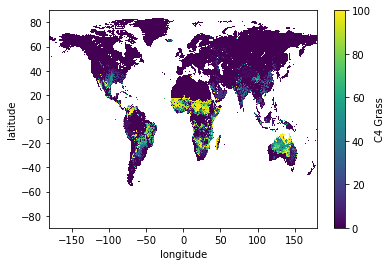

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
ds.PFT14.plot()

In [ ]:
wgs84 = 4326
albers = 102003 #EPSG = 5070 or 102003

Affine(0.050000001695656514, 0.0, -91.70000310983404,
       0.0, -0.049999999152053956, 39.44999933097057)

In [ ]:
rstr_src.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 327,
 'height': 302,
 'count': 33,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.050000001695656514, 0.0, -91.70000310983404,
        0.0, -0.049999999152053956, 39.44999933097057)}

In [ ]:
rstr_src.bounds

BoundingBox(left=-91.70000310983404, bottom=24.349999587050277, right=-75.35000255535437, top=39.44999933097057)